In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

## Data cleanning

In [2]:
data = pd.read_csv('C:/Users/ASUS/Documents/Kaggle/Portuguese_Bank/Bank_Marketing.csv')
data.columns=data.columns.str.lower().str.replace(' ', '_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    45211 non-null  int64 
 1   job                    45211 non-null  object
 2   marital_status         45211 non-null  object
 3   education              45211 non-null  object
 4   credit                 45211 non-null  object
 5   balance_(euros)        45211 non-null  int64 
 6   housing_loan           45211 non-null  object
 7   personal_loan          45211 non-null  object
 8   contact                45211 non-null  object
 9   last_contact_day       45211 non-null  int64 
 10  last_contact_month     45211 non-null  object
 11  last_contact_duration  45211 non-null  int64 
 12  campaign               45211 non-null  int64 
 13  pdays                  45211 non-null  int64 
 14  previous               45211 non-null  int64 
 15  poutcome           

In [3]:
data.head()

,age,job,marital_status,education,credit,balance_(euros),housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [4]:
data['last_contact_day'] = data['last_contact_day'].astype(str)

In [5]:
df = data.drop('contact', axis = 1).reset_index(drop = True)

In [22]:
df.to_csv('bank_marketing_normalized.csv', index=False)

In [23]:
upsample.to_csv('bank_marketing_upsample.csv', index=False)

In [11]:
df

,age,job,marital_status,education,credit,balance_(euros),housing_loan,personal_loan,last_contact_day,last_contact_month,last_contact_duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,1


In [17]:
df.rename(columns={'balance_(euros)': 'balance_euros'}, inplace=True)

In [19]:
df.head()

,age,job,marital_status,education,credit,balance_euros,housing_loan,personal_loan,last_contact_day,last_contact_month,last_contact_duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,1


## Get and transform the data

In [59]:
numerical = df.select_dtypes(include='number')
categorical= df.select_dtypes(include='object')
y = df['subscription']
numerical = numerical.drop('subscription', axis = 1)
encoded = pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categorical).toarray())

In [60]:
scaled= pd.DataFrame(StandardScaler().fit_transform(numerical))
final = pd.concat([encoded, scaled], axis=1)
x_train, x_test, y_train, y_test= train_test_split(final , y , test_size=.2)

In [61]:
model_log=LogisticRegression(solver='liblinear')
model_rf=RandomForestClassifier(n_estimators=10)
model_log.fit(x_train,y_train)
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [62]:
lr_pred_1 = model_log.predict(x_test)
rf_pred_1 = model_rf.predict(x_test)

In [63]:
model_log.score(x_test,y_test)

0.9025765785690589

In [64]:
accuracy_lr_1 = accuracy_score(y_test, lr_pred_1)
precision_lr_1 = precision_score(y_test, lr_pred_1)
recall_lr_1 = recall_score(y_test, lr_pred_1)
f1_lr_1 = f1_score(y_test, lr_pred_1)

print(f'Accuracy: {accuracy_lr_1}')
print(f'Precisión (Precision): {precision_lr_1}')
print(f'Recuperación (Recall): {recall_lr_1}')
print(f'F1-Score: {f1_lr_1}')

Accuracy: 0.9025765785690589
Precisión (Precision): 0.9190273843248348
Recuperación (Recall): 0.975566971557449
F1-Score: 0.9464535343098524


In [65]:
model_rf.score(x_test,y_test)

0.8977109366360722

In [66]:
# n_estimators= 10
accuracy_rf_1 = accuracy_score(y_test, rf_pred_1)
precision_rf_1 = precision_score(y_test, rf_pred_1)
recall_rf_1 = recall_score(y_test, rf_pred_1)
f1_rf_1 = f1_score(y_test, rf_pred_1)

print(f'Accuracy: {accuracy_rf_1}')
print(f'Precisión (Precision): {precision_rf_1}')
print(f'Recuperación (Recall): {f1_rf_1}')
print(f'F1-Score: {f1_rf_1}')

Accuracy: 0.8977109366360722
Precisión (Precision): 0.9152542372881356
Recuperación (Recall): 0.9438611397705893
F1-Score: 0.9438611397705893


# Test ussing Up-Sampling

In [20]:
df['subscription'].value_counts()

subscription
1    39922
2     5289
Name: count, dtype: int64

In [21]:
nos = df[df['subscription'] == 1].reset_index(drop=True)
yes = df[df['subscription'] == 2].reset_index(drop=True)
n_samples = len(nos)
yes = yes.sample(n=n_samples, replace=True, random_state=1).reset_index(drop=True)
upsample = pd.concat([nos, yes], axis=0).reset_index(drop=True)

In [70]:
numerical_up = upsample.select_dtypes(include='number')
categorical_up = upsample.select_dtypes(include='object')
y_up = upsample['subscription']
numerical_up = numerical_up.drop('subscription', axis = 1)
encoded_up = pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categorical_up).toarray())

In [71]:
scaled_up = pd.DataFrame(StandardScaler().fit_transform(numerical_up))
final_up = pd.concat([encoded_up, scaled_up], axis=1)
x_train, x_test, y_train, y_test= train_test_split(final_up , y_up , test_size=.2)

In [10]:
param_grid = {
    'n_estimators': [10, 50, 100, 200]  # Lista de valores a probar
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_n_estimators

10

In [72]:
model_log=LogisticRegression(solver='liblinear')
model_rf=RandomForestClassifier(n_estimators=10)
model_log.fit(x_train,y_train)
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [73]:
lr_pred = model_log.predict(x_test)
rf_pred = model_rf.predict(x_test)

In [74]:
model_log.score(x_test,y_test)

0.8307345481871126

In [75]:
model_rf.score(x_test,y_test)

0.9739495272089673

In [76]:
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

print(f'Accuracy: {accuracy_lr}')
print(f'Precisión (Precision): {precision_lr}')
print(f'Recuperación (Recall): {recall_lr}')
print(f'F1-Score: {f1_lr}')

Accuracy: 0.8307345481871126
Precisión (Precision): 0.8209009445386292
Recuperación (Recall): 0.8470573534924404
F1-Score: 0.8337740606358772


In [77]:
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)

print(f'Accuracy: {accuracy_rf}')
print(f'Precisión (Precision): {precision_rf}')
print(f'Recuperación (Recall): {recall_rf}')
print(f'F1-Score: {f1_rf}')

Accuracy: 0.9739495272089673
Precisión (Precision): 0.9994733377221856
Recuperación (Recall): 0.9485193052605273
F1-Score: 0.9733299140915501


In [28]:
k = []
for i in range(120, 125, 1):
    k.append(i)
k_accuracy = []
for i in k:
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(x_train, y_train)
    k_accuracy.append(kn.score(x_test, y_test))

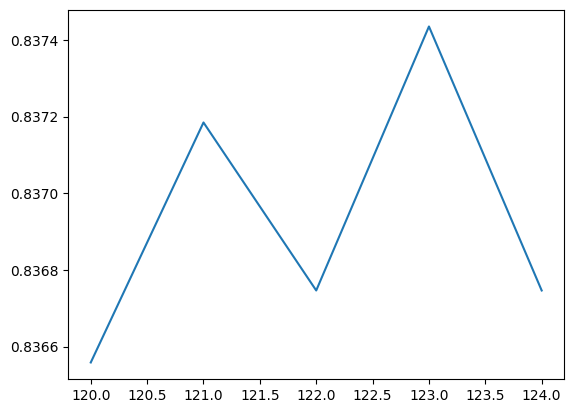

In [29]:
plt.plot(k, k_accuracy)

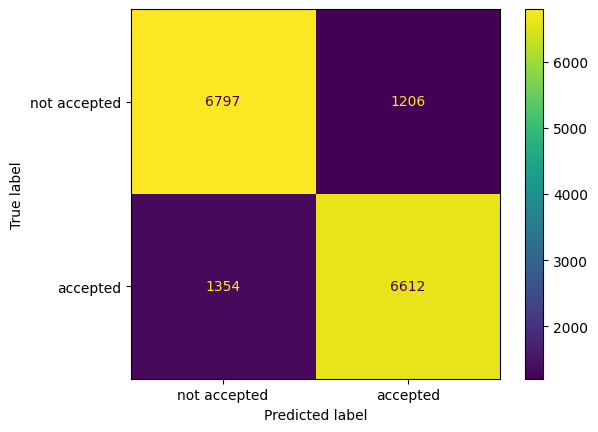

In [78]:
kn = KNeighborsClassifier(n_neighbors = 123)
kn.fit(x_train, y_train)
prediction = kn.predict(x_test)
cm =confusion_matrix(y_test, prediction, labels = kn.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['not accepted', 'accepted'])
cm_disp.plot()

In [79]:
accuracy_score(y_test, prediction)

0.83968939820903

In [80]:
ecod = LabelEncoder().fit_transform(y_test)
y_prob = kn.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(ecod, y_prob, pos_label = 1)
roc_auc = auc(fpr, tpr)
roc_auc

0.9142450707898924

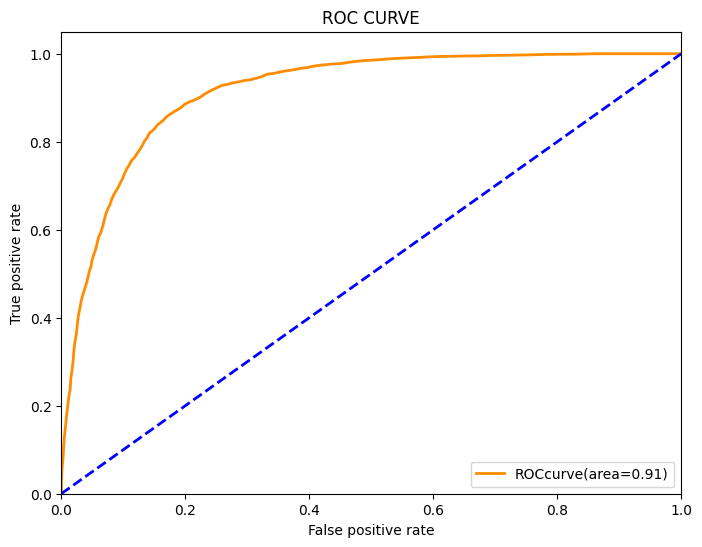

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw = 2, label=f'ROCcurve(area={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

In [82]:
accuracy_lr_knn = accuracy_score(y_test, prediction)
precision_lr_knn = precision_score(y_test, prediction)
recall_lr_knn = recall_score(y_test, prediction)
f1_lr_knn = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy_lr_knn}')
print(f'Precisión (Precision): {precision_lr_knn}')
print(f'Recuperación (Recall): {recall_lr_knn}')
print(f'F1-Score: {f1_lr_knn}')

Accuracy: 0.83968939820903
Precisión (Precision): 0.8338854128327813
Recuperación (Recall): 0.8493065100587279
F1-Score: 0.8415253188064874
